## Examine historical weather data for NYC for citibke project.
- Historical weather data downloaded to sqlite databes w/ **get_weather_data.py**

In [33]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['lines.linewidth'] = 3

In [34]:
con = sqlite3.connect("data/nyc_weather.db3")

In [35]:
df = pd.read_sql_query("SELECT * FROM temps",con)

In [36]:
df.precip_In[df.precip_In=='T'] = 0
df.precip_In = df.precip_In.astype('float64')

/Users/Andy/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


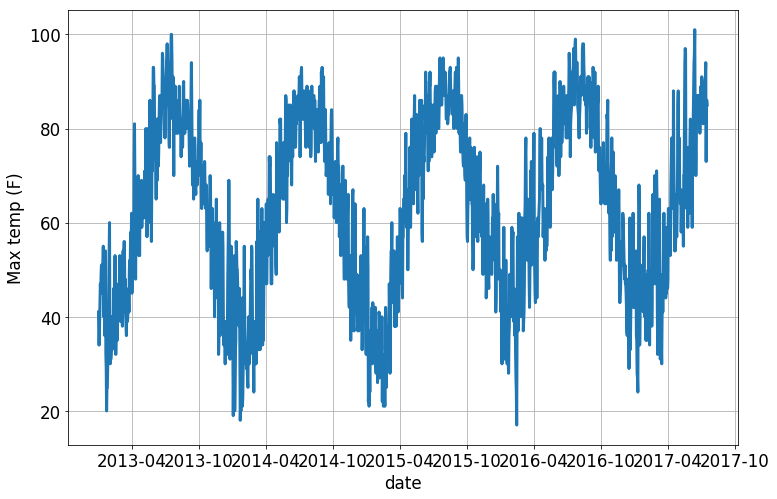

In [37]:
plt.figure(figsize=(12,8))
plt.plot(pd.to_datetime(df.date), df.max_temp)
plt.grid()
plt.xlabel('date')
plt.ylabel('Max temp (F)')

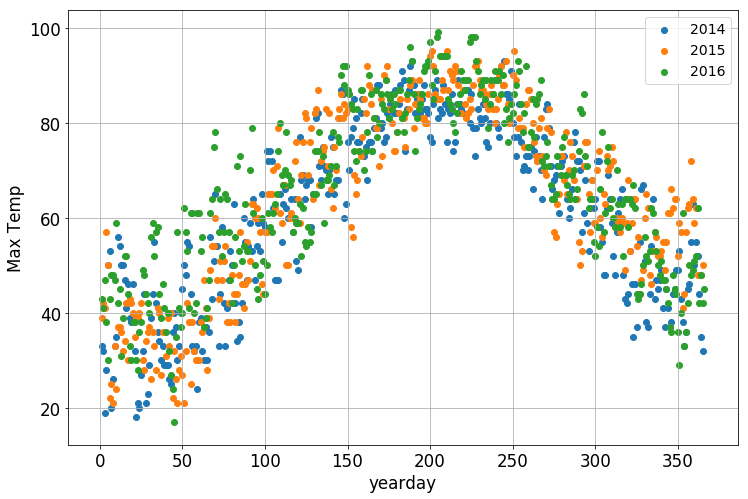

In [15]:
plt.figure(figsize=(12,8))
for year in [2014,2015,2016]:    
    plt.scatter( df.loc[df.year==year].yday, df.loc[df.year==year].max_temp,label=str(year))
plt.grid()
plt.xlabel('yearday')
plt.ylabel('Max Temp')
plt.legend()

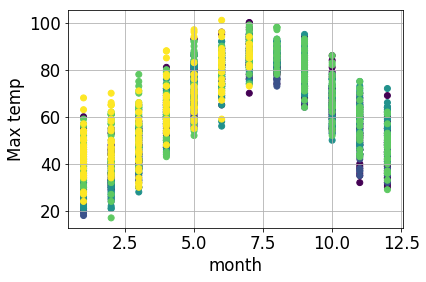

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(df.month,df.max_temp,c=df.year)
plt.grid()
plt.xlabel('month')
plt.ylabel('Max temp')

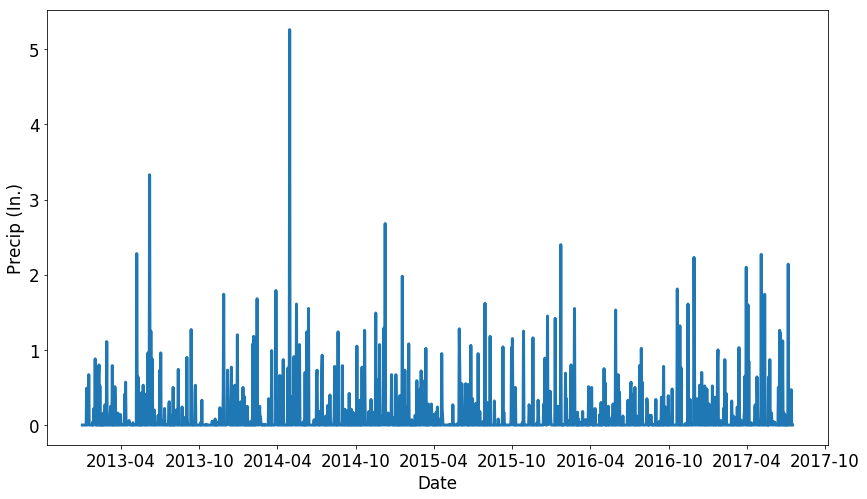

In [44]:
plt.figure(figsize=(14,8))
plt.plot(pd.to_datetime(df.date), df.precip_In)
plt.xlabel('Date')
plt.ylabel('Precip (In.)')

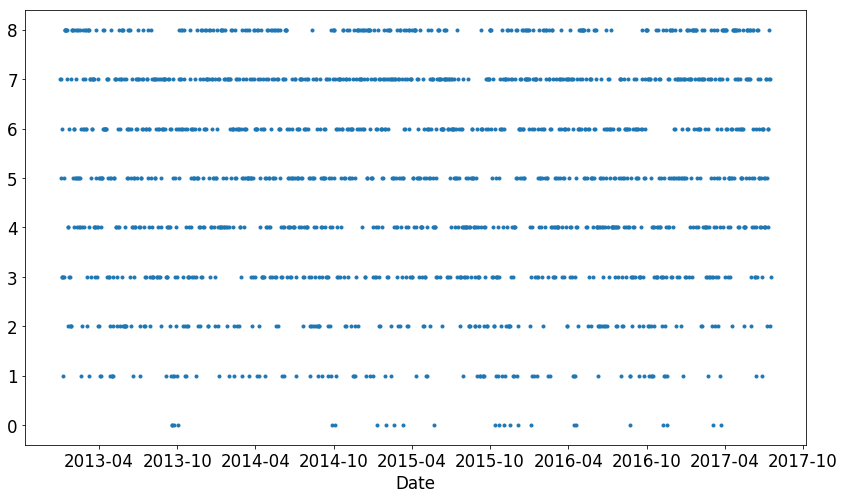

In [52]:
#df2 = df.copy()
#df2 = df2[df2.year==2014]
plt.figure(figsize=(14,8))
plt.plot(pd.to_datetime(df.date), df.cloud_cover,'.')
plt.xlabel('Date')

(array([  24.,   87.,  128.,  186.,    0.,  227.,  238.,  246.,  294.,  229.]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ]),
 <a list of 10 Patch objects>)

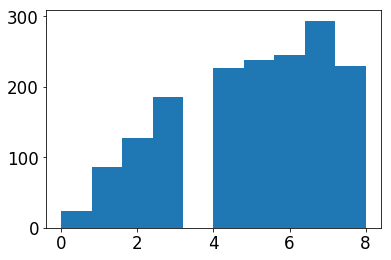

In [72]:
plt.hist(df.cloud_cover)

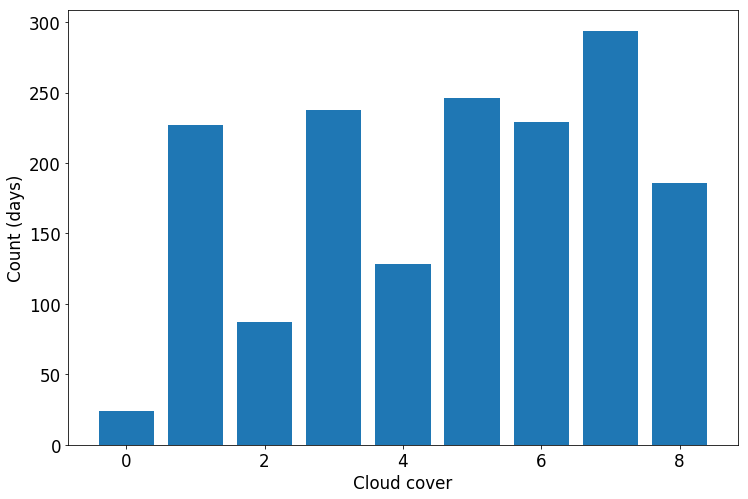

In [82]:
plt.figure(figsize=(12,8))
plt.bar(df.cloud_cover.unique(),df.cloud_cover.value_counts())
plt.xlabel('Cloud cover')
plt.ylabel('Count (days)');

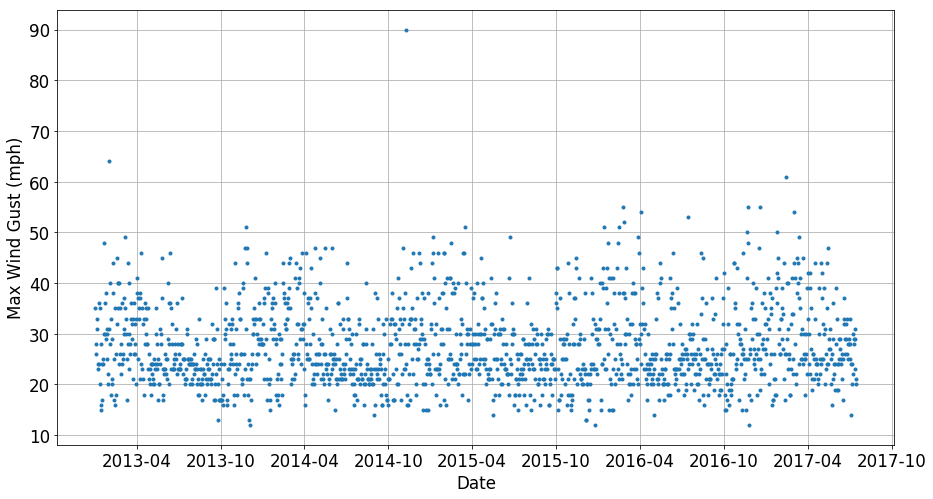

In [90]:
plt.figure(figsize=(15,8))
plt.plot(pd.to_datetime(df.date),df.max_gust_mph,'.')
plt.xlabel('Date')
plt.ylabel('Max Wind Gust (mph)');
plt.grid()

In [8]:
con.close()